In [1]:
#불러온 데이터를 실행해 보자
#총 6만개의 학습셋과 1만개의 테스트셋을 불러와 속성 값을 지닌 X, 클래스 값을 지닌 Y로 구분하는 작업을 다시 한번 정리

In [19]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [31]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [32]:
#딥러닝을 실행하고자 프레임을 설정한다
#총 784개의 속성이 있고, 10개의 클래스가 있다

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
#모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정
#10회이상 모델의 성과 향상이 없으면 자동으로 학습을 중단

In [36]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [37]:
#샘플 200개를 모두 30번 실행하게끔 설정한다
#그리고 테스트셋으로 최종 모델의 성과를 측정하여 그 값을 출력한다

In [38]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])

print('Test Accuracy : %.4f' %(model.evaluate(X_test,Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./model\02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08895, saving model to ./model\03-0.0889.hdf5

Epoch 00004: val_loss improved from 0.08895 to 0.07867, saving model to ./model\04-0.0787.hdf5

Epoch 00005: val_loss improved from 0.07867 to 0.07374, saving model to ./model\05-0.0737.hdf5

Epoch 00006: val_loss improved from 0.07374 to 0.06788, saving model to ./model\06-0.0679.hdf5

Epoch 00007: val_loss improved from 0.06788 to 0.06615, saving model to ./model\07-0.0661.hdf5

Epoch 00008: val_loss improved from 0.06615 to 0.06283, saving model to ./model\08-0.0628.hdf5

Epoch 00009: val_loss did not improve from 0.06283

Epoch 00010: val_loss did not improve from 0.06283

Epoch 00011: val_loss did not improve from 0.06283

Epoch 00012: val_loss did not improve from 0.06283

Epoch 00013: val_loss impro

In [40]:
#실행결과를 그래프로 표현해 보자 

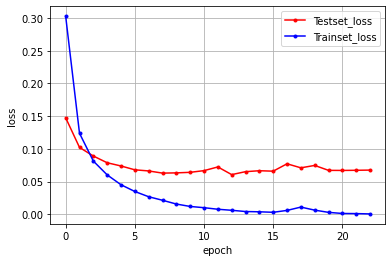

In [41]:
import matplotlib.pyplot as plt

#테스트셋의 오차
y_vloss = history.history['val_loss']

#학습셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [58]:
#학습셋에 대한 오차는 계속해서 줄어든다
#테스트셋의 과적합이 일어나기 전 학습을 끝낸것이 보인다

#### - 코드정리

In [42]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

In [43]:
#seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [44]:
#MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [45]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [47]:
#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [48]:
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
#모델 최적화 설정
MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [51]:
#모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./model\02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08895, saving model to ./model\03-0.0889.hdf5

Epoch 00004: val_loss improved from 0.08895 to 0.07867, saving model to ./model\04-0.0787.hdf5

Epoch 00005: val_loss improved from 0.07867 to 0.07374, saving model to ./model\05-0.0737.hdf5

Epoch 00006: val_loss improved from 0.07374 to 0.06788, saving model to ./model\06-0.0679.hdf5

Epoch 00007: val_loss improved from 0.06788 to 0.06615, saving model to ./model\07-0.0661.hdf5

Epoch 00008: val_loss improved from 0.06615 to 0.06283, saving model to ./model\08-0.0628.hdf5

Epoch 00009: val_loss did not improve from 0.06283

Epoch 00010: val_loss did not improve from 0.06283

Epoch 00011: val_loss did not improve from 0.06283

Epoch 00012: val_loss did not improve from 0.06283

Epoch 00013: val_loss impro

In [53]:
#정확도 출력
print('Test Accuracy : %.4f' %(model.evaluate(X_test,Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9836
Test Accuracy : 0.9836


In [54]:
#테스트셋의 오차
y_vloss = history.history['val_loss']

In [55]:
#학습셋의 오차
y_loss = history.history['loss']

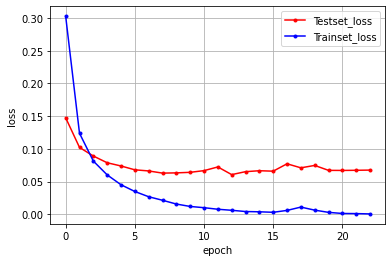

In [57]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()